In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("https://milliams.com/courses/data_analysis_python/titanic.csv")
#data = pd.read_csv('input/titanic.csv')
data.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


In [2]:
data['survived'].value_counts()  

no     1496
yes     711
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

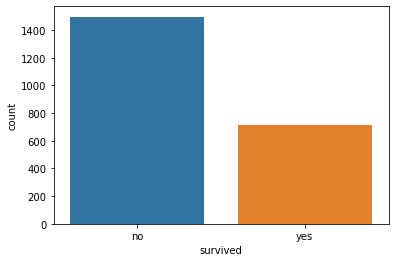

In [3]:
sns.countplot(x='survived',data=data )

In [4]:
#Find the average age of all people on board
data["age"].mean()

30.436734693877504

In [5]:
#Use a filter to select only the males
all_males = data[data["gender"] == "male"]
all_males["age"].mean()

30.83231351981346

In [6]:
#Find the average age of the males on board
all_males["age"].mean()

30.83231351981346

In [7]:
#Select on the people in 3rd class
data[data["class"] == "3rd"].head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


In [8]:
passengers = data[(data["class"] == "1st") | 
                     (data["class"] == "2nd") | 
                     (data["class"] == "3rd")]
passengers = data[data["class"].isin(["1st", "2nd", "3rd"])]
passengers.head()

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,0.0,0.0,yes


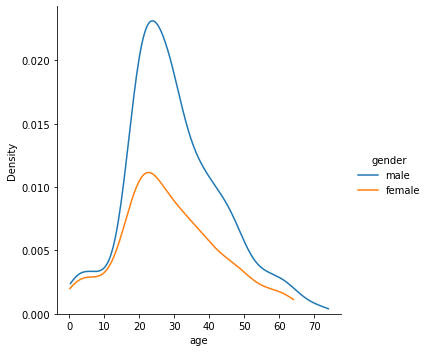

In [9]:
#Plot the distribution of ages for males and females
sns.displot(data=passengers,
            x="age",
            hue="gender",
            kind="kde",
            cut=0)

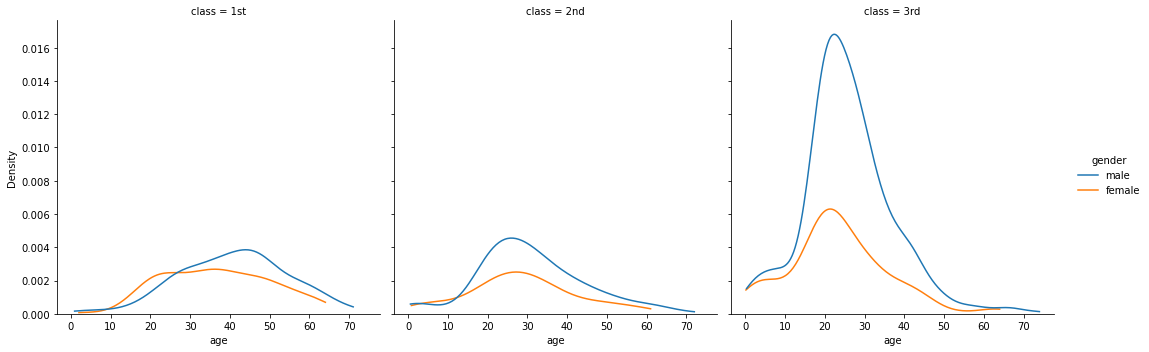

In [10]:
# All that has changed from the last plot is adding in the split by class over multiple columns:
sns.displot(data=passengers,
            x="age",
            hue="gender",
            kind="kde",
            cut=0,
            col="class",
            col_order=["1st", "2nd", "3rd"])

In [11]:
# Combining
# To reduce the duplication of effort here, I create a function which, given a set of data, calculated the survived fraction within. This is then called three times, once for each class:

def survived_ratio(df):
    yes = df[df["survived"] == "yes"]
    return len(yes) / len(df)

ratio_1st = survived_ratio(passengers[passengers["class"] == "1st"])
ratio_2nd = survived_ratio(passengers[passengers["class"] == "2nd"])
ratio_3rd = survived_ratio(passengers[passengers["class"] == "3rd"])
print(ratio_1st, ratio_2nd, ratio_3rd)

0.6203703703703703 0.4154929577464789 0.2552891396332863


## Plot 敘述

<AxesSubplot:xlabel='survived', ylabel='count'>

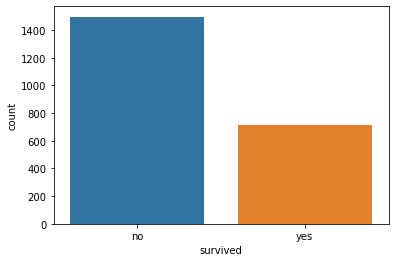

In [12]:
sns.countplot(x='survived',data=data)

## Clean Values

In [13]:
# lets check the Missing Values
data.isnull().sum()

name          0
gender        0
age           2
class         0
embarked      0
country      81
ticketno    891
fare        916
sibsp       900
parch       900
survived      0
dtype: int64

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


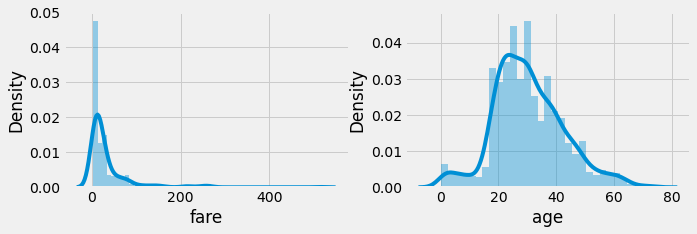

In [14]:
# lets Impute the Missing Values
data['age'] = data['age'].fillna(data['age'].mean())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data.isnull().sum().sum()

# lets Check the Distribution of Age and Fare
plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.distplot(data['fare'])
plt.subplot(1, 2, 2)
sns.distplot(data['age'])
plt.show()

## Filter Group Function
## 利用條件式進行分類

In [15]:
def fare_cat(x):
    if x < 100:
        return "Cheap"
    else:
        return "Expensive"
    
# apply Function
data['fare'] = data['fare'].apply(fare_cat)
data['fare'].value_counts()

Cheap        1206
Expensive    1001
Name: fare, dtype: int64

In [16]:
def age_cat(x):
    if x < 12:
        return 'Kids'
    elif x >= 12 and x < 18:
        return 'Grown Ups'
    elif x >= 18 and x < 35:
        return 'Adults'
    elif x > 35:
        return 'Old'

# apply Function
data['age'] = data['age'].apply(age_cat)
data['age'].value_counts()

Adults       1272
Old           684
Kids          106
Grown Ups      94
Name: age, dtype: int64

In [17]:
def fam_cat(x):
    if x == 1:
        return 'Alone'
    elif x > 1 and x <= 4:
        return 'Small Family'
    else:
        return 'Large Family'

# apply Function
data['FamilySize'] = data['sibsp'] + data['parch'] + 1
data['FamilySize'] = data['FamilySize'].apply(fam_cat)
data['FamilySize'].value_counts()

Large Family    982
Alone           788
Small Family    437
Name: FamilySize, dtype: int64

In [18]:
# lets Extract the Information of Marraige from the Names of the Passengers
data['Title'] = data['name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
data['Title'] = data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
data['Title'] = data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'],'Dr/Military/Noble/Clergy')
data['Title'].value_counts()

Mr                          1586
Miss/Mrs/Ms                  482
Master                        61
Sig                           42
Dr/Military/Noble/Clergy      16
Fr                             6
Colonel                        3
Sra                            3
Captain                        2
Sr                             2
Revd                           1
Lucy Christiana                1
Doña                           1
Lucy Noël Martha               1
Name: Title, dtype: int64